# C3 Simulator as a backend for Qiskit Experiments

This notebook demonstrates the use of the C3 Simulator with a high-level quantum programming framework [Qiskit](https://www.qiskit.org). You must additionally install qiskit and matplotlib to run this example.

In [1]:
!pip install -q qiskit matplotlib

In [11]:
from pprint import pprint
import numpy as np
from c3.qiskit import C3Provider
from c3.qiskit.c3_gates import RX90pGate
from qiskit import transpile, QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

## Define a basic Quantum circuit

In [12]:
qc = QuantumCircuit(3)
qc.append(RX90pGate(), [0])
qc.append(RX90pGate(), [1])

In [13]:
qc.draw()

┌────────────┐
q_0: ┤ Rx90p(π/2) ├
     ├────────────┤
q_1: ┤ Rx90p(π/2) ├
     └────────────┘
q_2: ──────────────

## Get the C3 Provider and Backend

In [14]:
c3_provider = C3Provider()
c3_backend = c3_provider.get_backend("c3_qasm_physics_simulator")

In [15]:
config = c3_backend.configuration()

print("Name: {0}".format(config.backend_name))
print("Version: {0}".format(config.backend_version))
print("Max Qubits: {0}".format(config.n_qubits))
print("OpenPulse Support: {0}".format(config.open_pulse))
print("Basis Gates: {0}".format(config.basis_gates))

Name: c3_qasm_physics_simulator
Version: 0.1
Max Qubits: 10
OpenPulse Support: False
Basis Gates: ['cx', 'rx']


## Run a physical device simulation using C3

In [16]:
c3_backend.set_device_config("qiskit.cfg")
c3_job = c3_backend.run(qc)
result = c3_job.result()

In [17]:
res_counts = result.get_counts()
pprint(res_counts)

{'0': 0.2501927838288742,
 '1': 1.3433540939166752e-47,
 '10': 0.2749604122313709,
 '100': 0.2511657399090722,
 '101': 3.285567472819051e-34,
 '11': 8.48789239568126e-33,
 '110': 0.2236810640306745,
 '111': 4.031589164760562e-51}


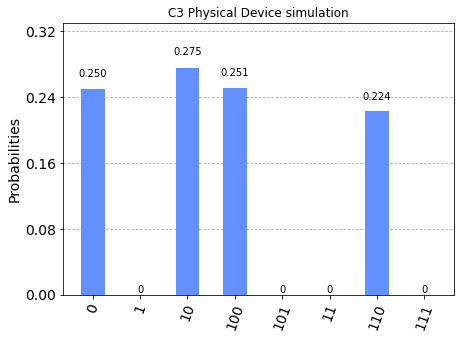

In [18]:
plot_histogram(res_counts, title='C3 Physical Device simulation')

As we can see above, the c3 simulator correctly calculates the populations while accounting for non-optimal pulses and device limitations.

## Run Simulation and verify results on Qiskit simulator

Qiskit uses little-endian bit ordering while most Quantum Computing literature uses big-endian. This is reflected in the reversed ordering of qubit labels here.

Ref: [Basis Vector Ordering in Qiskit](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html#Basis-vector-ordering-in-Qiskit)

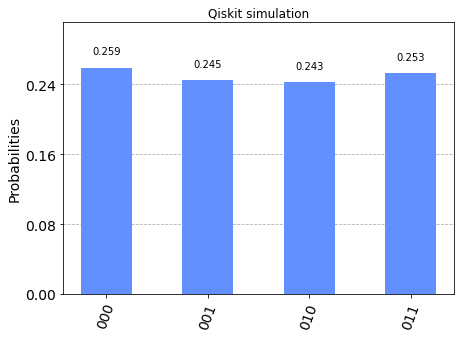

In [19]:
qiskit_simulator = BasicSimulator()
qc.measure_all()
qc = transpile(qc, qiskit_simulator)
qiskit_result = qiskit_simulator.run(qc, shots=1000).result()
counts = qiskit_result.get_counts(qc)
plot_histogram(counts, title='Qiskit simulation')